In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [196]:
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(f'./data/train/{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

### Get image aspect ratio

In [174]:
def get_img_size_by_name(img_name):
    img = plt.imread(f'./data/train/'+img_name)
    return img.shape

In [177]:
train_df['size'] = train_df['Image'].map(lambda s: get_img_size_by_name(s))

In [180]:
train_df['height'] = train_df['size'].map(lambda x: x[0])
train_df['width'] = train_df['size'].map(lambda x: x[1])
train_df['aspect'] = train_df['size'].map(lambda x: float(x[0]/x[1]))

In [191]:
# RGB color: 1, Gray-scale: 0
train_df['color'] = train_df['size'].map(lambda x: len(x)-2)

In [192]:
train_df.head()

,Image,Id,size,height,width,aspect,color
0,00022e1a.jpg,w_e15442c,"(500, 699)",500,699,0.715308,0
1,000466c4.jpg,w_1287fbc,"(700, 1050, 3)",700,1050,0.666667,1
2,00087b01.jpg,w_da2efe0,"(368, 1050, 3)",368,1050,0.350476,1
3,001296d5.jpg,w_19e5482,"(170, 397, 3)",170,397,0.428212,1
4,0014cfdf.jpg,w_f22f3e3,"(398, 700)",398,700,0.568571,0


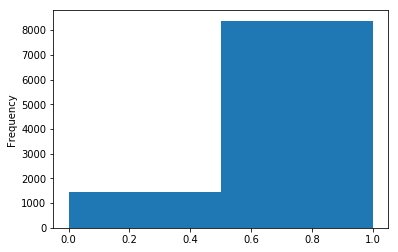

In [193]:
train_df.color.plot.hist(bins=2)

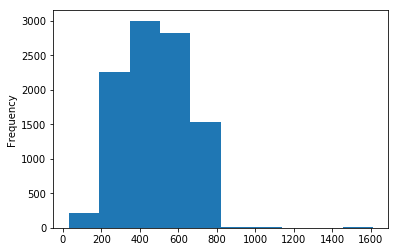

In [194]:
train_df.height.plot.hist(bins=10)

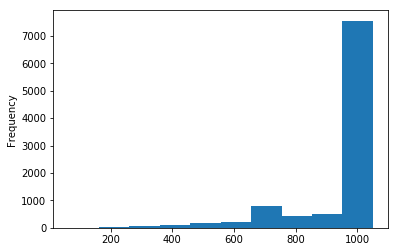

In [195]:
train_df.width.plot.hist(bins=10)

(0.3, 0.7)

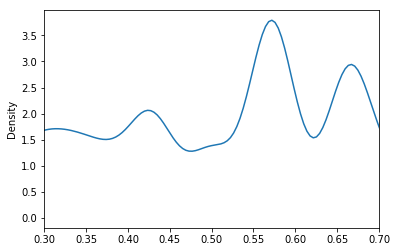

In [190]:
train_df.aspect.plot.kde()
plt.xlim((0.3,0.7))

In [217]:
train_df[train_df['aspect']>0.75].aspect.sort_values()

6786    0.750476
1529    0.750476
7305    0.750476
7751    0.750476
8047    0.750476
8451    0.750476
6700    0.750476
769     0.750476
5138    0.750476
9211    0.750476
4667    0.750476
2589    0.750476
610     0.750476
6178    0.750476
1035    0.752161
1854    0.752866
3905    0.753333
7205    0.753333
9846    0.754286
3786    0.755714
242     0.756190
8966    0.757062
3160    0.759113
2697    0.760925
9681    0.760952
5317    0.761122
1483    0.764208
479     0.764791
9776    0.767619
3084    0.769009
          ...   
1301    0.977228
557     1.000000
1481    1.007619
1770    1.014286
4156    1.021505
3371    1.024882
8067    1.056667
8288    1.076841
83      1.081333
6099    1.114790
9773    1.121905
9693    1.123810
3221    1.241818
432     1.251761
9002    1.274286
4430    1.333333
542     1.333333
2402    1.400000
9274    1.499048
9648    1.500000
9415    1.500000
7138    1.500000
7318    1.500000
1611    1.500000
4250    1.500000
6195    1.536190
1410    1.663082
6290    1.6828

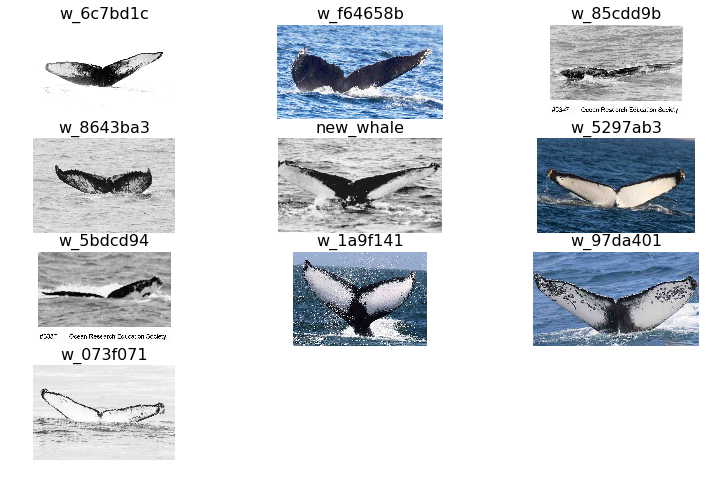

In [234]:
rand_rows = train_df[(train_df['aspect']>0.5) & (train_df['aspect']<0.75)].sample(frac=1.)[:10]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

### RGB to Grayscale

In [666]:
def grayscale_image(img):
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    Bn = 16*np.sqrt(B)
    Gn = 16*np.sqrt(G)
    grayscaled = np.stack([B,G,R],axis=2)
    return grayscaled.max(axis=2)

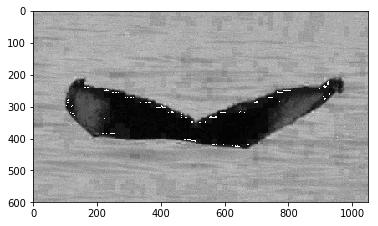

In [687]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]
Bn = 2*B-R
Gn = 2*G-R
grayscaled = np.stack([R,Gn,Bn],axis=2)
plt.imshow(np.uint8(grayscaled.max(axis=2)), cmap='gray')

In [685]:
B-np.max(0,(B-R)/255)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

TypeError: only size-1 arrays can be converted to Python scalars

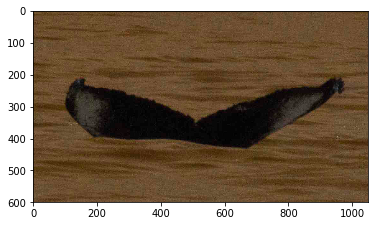

In [667]:
img_name = '0b1d25f5.jpg'
# load image to OpenCV as gray scale (parameter "0")
img = cv2.imread('./data/train/'+img_name) 
plt.imshow(img, cmap='gray')
# cv2.imwrite( "grey.png", img )
plt.imshow(grayscale_image(img), cmap='gray')

In [651]:
grayscale_image(img).shape

(599, 1050)

In [642]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]
B = (B+128)/2
G = (G+128)/2
blue_img = np.stack([B,G,R],axis=2)

In [643]:
B.max()

127.5

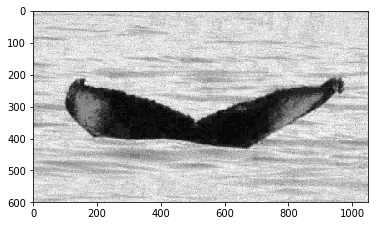

In [644]:
plt.imshow(blue_img.max(axis=2), cmap='gray')


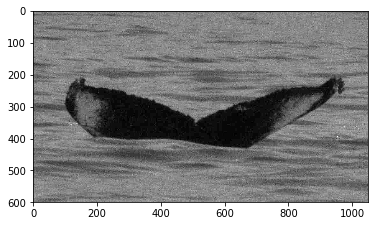

In [562]:
gray_img = cv2.imread('./data/train/'+img_name, 0) 
plt.imshow(gray_img, cmap='gray')

### Add padding

In [474]:
def pad_image(img):
    V = img.shape[0]
    H = img.shape[1]
    top = int(0.5*(H//2-V))
    bottom = top
    left = 0
    right = 0
    img_pad = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=225)
    return img_pad

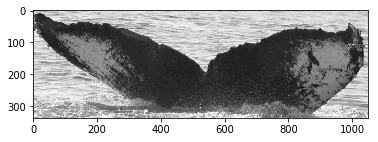

In [475]:
img_name = '0fcbbfeb.jpg'
img = cv2.imread('./data/train/'+img_name,0)
plt.imshow(img, cmap='gray')

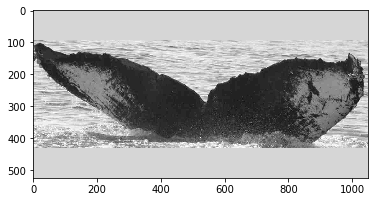

In [476]:
padded = pad_image(img)
plt.imshow(img_pad, cmap='gray')

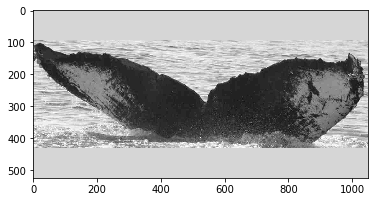

In [244]:
# add light gray padding (225 brightness) 
# only apply to images with aspect ratio narrower than 1:2
H = img.shape[0]
W = img.shape[1]
top = int(0.5*(W//2-H))
bottom = top
left = 0
right = 0
img_pad = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=225)
plt.imshow(img_pad, cmap='gray')

### Cropping images

In [589]:
def crop_image(img):
    canny_edges = cv2.Canny(img,300,300)
    edge_ratio = canny_edges.sum()/img.shape[0]/img.shape[1]
    if edge_ratio < 0.5:
        canny_edges = cv2.Canny(img,150,150)
    vcdf = np.cumsum(canny_edges.sum(axis=1)/canny_edges.sum())
    hcdf = np.cumsum(canny_edges.sum(axis=0)/canny_edges.sum())
    top = max(0, np.searchsorted(vcdf, 0.1, side="left")-100)
    left = max(0, np.searchsorted(hcdf, 0.1, side="left")-100)
    right = min(img.shape[1], np.searchsorted(hcdf, 0.9, side="left")+100)
    bottom = min(img.shape[0], top+(right-left)//2)
    cropped = img[top:bottom,left:right]
    return cropped

In [689]:
name_list = ['00f22419.jpg',
             '0acce63b.jpg',
             '0bc1562c.jpg',
             '0e891ec9.jpg',
             '0e8ce258.jpg',
             '1b36d7bb.jpg',
             '1b089ea6.jpg',
             '1b11b397.jpg',
             '000466c4.jpg',
             '0fcbbfeb.jpg',
             '0a0bc259.jpg',
             '0dd07e82.jpg',
             '0e672fdd.jpg',
             '0b352859.jpg',
             '7b077a97.jpg','0d4e8a7e.jpg']

In [690]:
img = cv2.imread('./data/train/'+name_list[-1],0)
img.shape

(601, 1050)

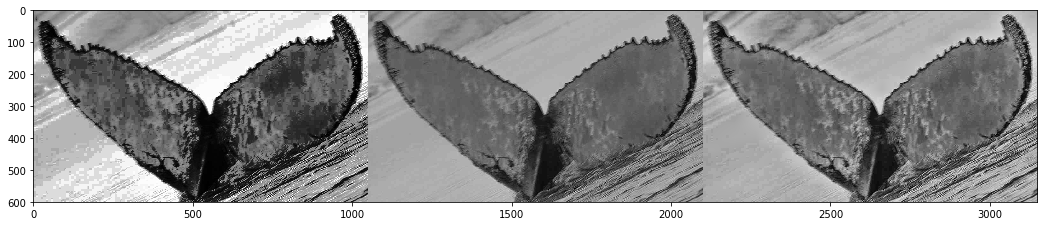

In [691]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16,16))
cl1 = clahe.apply(img)
equ = cv2.equalizeHist(img)
comp = np.hstack((equ,img,cl1)) #stacking images side-by-side
plt.figure(figsize=(18,5))
plt.imshow(comp,cmap='gray')

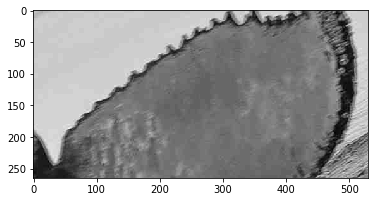

In [692]:
cropped = crop_image(img)
plt.imshow(cropped,cmap='gray')

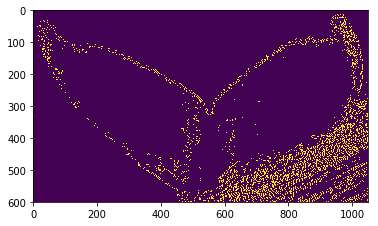

In [693]:

canny_edges = cv2.Canny(img,150,150)
plt.figure
plt.imshow(canny_edges)

In [694]:
canny_edges.sum()/img.shape[0]/img.shape[1]

12.928405039220348

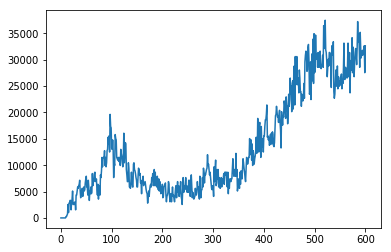

In [695]:
plt.plot(canny_edges.sum(axis=1))

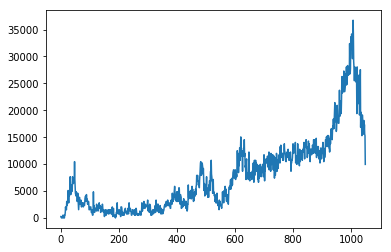

In [696]:
plt.plot(canny_edges.sum(axis=0))

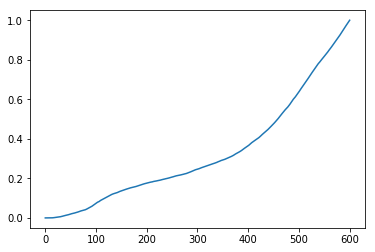

In [697]:
vcdf = np.cumsum(canny_edges.sum(axis=1)/canny_edges.sum())
plt.plot(vcdf)

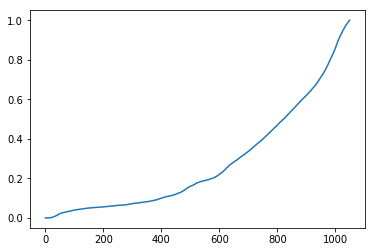

In [698]:
hcdf = np.cumsum(canny_edges.sum(axis=0)/canny_edges.sum())
plt.plot(hcdf)

In [702]:
top = max(0, np.searchsorted(vcdf, 0.1, side="left")-50)
left = max(0, np.searchsorted(hcdf, 0.05, side="left")-50)
right = min(img.shape[1], np.searchsorted(hcdf, 0.95, side="left")+50)
bottom = min(img.shape[0], top+(right-left)//2)


In [703]:
[top, bottom, left, right]

[68, 543, 99, 1050]

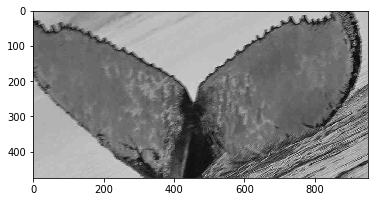

In [704]:
cropped = img[top:bottom,left:right]
plt.imshow(cropped, cmap='gray')

### Put everything together

In [706]:
import numpy as np
import cv2
import os

def grayscale_image(img):
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
#     B = B*0.5+(255-R)*0.5
#     G = G*0.5+(255-R)*0.5
    grayscaled = np.stack([B,G,R],axis=2)
    return grayscaled.max(axis=2)

def pad_image(img):
    V = img.shape[0]
    H = img.shape[1]
    top = int(0.5*(H//2-V))
    bottom = top
    left = 0
    right = 0
    img_pad = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=200)
    return img_pad

def crop_image(img):
    canny_edges = cv2.Canny(img,300,300)
    edge_ratio = canny_edges.sum()/img.shape[0]/img.shape[1]
    if edge_ratio < 0.5:
        canny_edges = cv2.Canny(img,150,150)
    vcdf = np.cumsum(canny_edges.sum(axis=1)/canny_edges.sum())
    hcdf = np.cumsum(canny_edges.sum(axis=0)/canny_edges.sum())
    left = max(0, np.searchsorted(hcdf, 0.05, side="left")-50)
    right = min(img.shape[1], np.searchsorted(hcdf, 0.95, side="left")+50)
    top = max(0, np.searchsorted(vcdf, 0.1, side="left")-100)
    bottom = min(img.shape[0], top+(right-left)//2)
    top = min(top, bottom-(right-left)//2)
    cropped = img[top:bottom,left:right]
    return cropped

def enhance_image(img):
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16,16))
    enhanced = clahe.apply(img)
    return enhanced

def main():
    INPUT_DIR = './data/train/'
    OUTPUT_DIR = './data/train_processed/'
    for file in os.listdir(INPUT_DIR):
        img = cv2.imread(INPUT_DIR+file)
        img = grayscale_image(img)
        img = np.uint8(img)
        V,H = img.shape
        if V >= H//2:
            new_img = crop_image(img)
        else:
            new_img = pad_image(img)
        new_img = enhance_image(new_img)
        new_file_path = OUTPUT_DIR+file
        cv2.imwrite(new_file_path, new_img)

# This is the standard boilerplate that calls the main() function.
if __name__ == '__main__':
    main()